# STEP 1: IMPORT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, roc_auc_score, roc_curve)
import xgboost as xgb
from xgboost import XGBClassifier

# STEP 2: LOAD DATASET

In [2]:
# Load Breast Cancer dataset (built-in sklearn)
cancer = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

print(f"✓ Dataset loaded: {df.shape}")
print(f"✓ Samples: {len(df)}")
print(f"✓ Features: {len(cancer.feature_names)}")
print(f"✓ Classes: 2 (Binary Classification)")

✓ Dataset loaded: (569, 32)
✓ Samples: 569
✓ Features: 30
✓ Classes: 2 (Binary Classification)


# STEP 3: BASIC EDA

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Malignant


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'diagnosis'],
      dtype='object')

In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# Target distribution
print("--- Target Distribution ---")
print(df['diagnosis'].value_counts())

print(f"\n✓ Missing Values: {df.isnull().sum().sum()} (None!)")

--- Target Distribution ---
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

✓ Missing Values: 0 (None!)


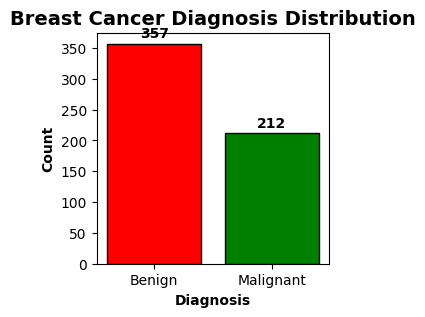

In [15]:
# Visualize target distribution
plt.figure(figsize=(3,3))

diagnosis_counts = df['diagnosis'].value_counts()
colors = ['red', 'green']

plt.bar(diagnosis_counts.index, diagnosis_counts.values,
        color=colors, edgecolor='black')

plt.title('Breast Cancer Diagnosis Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Diagnosis', fontweight='bold')

for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.show()


In [16]:
print(f"\n⚠️ MILD CLASS IMBALANCE:")
print(f"   Benign: {diagnosis_counts['Benign']} ({diagnosis_counts['Benign']/len(df)*100:.1f}%)")
print(f"   Malignant: {diagnosis_counts['Malignant']} ({diagnosis_counts['Malignant']/len(df)*100:.1f}%)")
print(f"   Ratio: {diagnosis_counts['Benign']/diagnosis_counts['Malignant']:.2f}:1")


⚠️ MILD CLASS IMBALANCE:
   Benign: 357 (62.7%)
   Malignant: 212 (37.3%)
   Ratio: 1.68:1


--- Creating Correlation Heatmap (Top 10 Features) ---


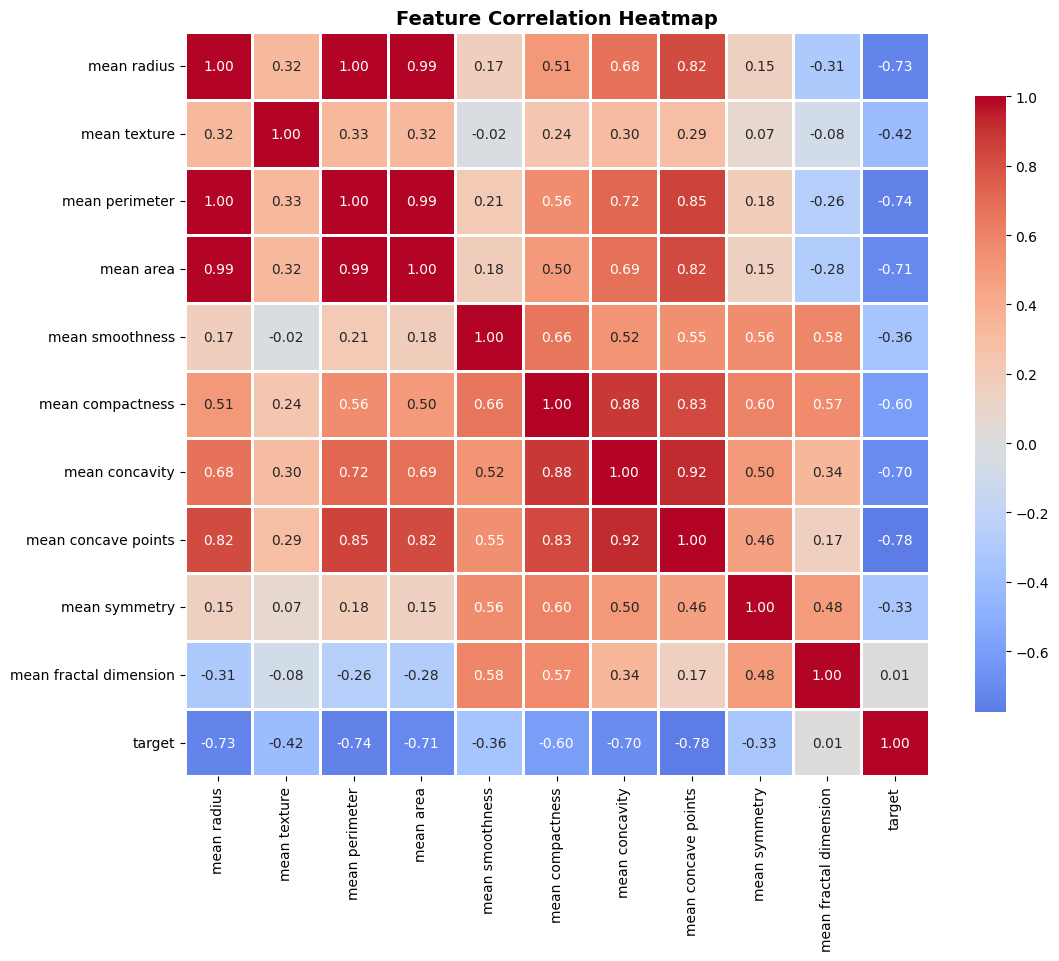

In [18]:
# Correlation heatmap (top 10 features)
print("--- Creating Correlation Heatmap (Top 10 Features) ---")

top_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                'mean smoothness', 'mean compactness', 'mean concavity',
                'mean concave points', 'mean symmetry', 'mean fractal dimension']

plt.figure(figsize=(12, 10))

correlation = df[top_features + ['target']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontweight='bold', fontsize=14)

plt.show()

# STEP 4: PREPARE DATA

In [19]:
X = df[cancer.feature_names]
y = df['target']

print(f"✓ Features: {X.shape[1]} numerical features")
print(f"✓ Target: 0=Malignant, 1=Benign")
print(f"✓ Shape: {X.shape}")

✓ Features: 30 numerical features
✓ Target: 0=Malignant, 1=Benign
✓ Shape: (569, 30)


# STEP 5: TRAIN-TEST SPLIT

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Features: {X_train.shape[1]}")

print(f"\nTraining set distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting set distribution:")
print(pd.Series(y_test).value_counts().sort_index())

✓ Training samples: 455 (80.0%)
✓ Testing samples: 114 (20.0%)
✓ Features: 30

Training set distribution:
target
0    170
1    285
Name: count, dtype: int64

Testing set distribution:
target
0    42
1    72
Name: count, dtype: int64


# STEP 6: FEATURE SCALING (OPTIONAL FOR XGBOOST, BUT GOOD PRACTICE)

### 💡 XGBoost is tree-based - scaling not required!"
 • But we'll scale for consistency and potential performance gain"


In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"✓ Features scaled with StandardScaler")

✓ Features scaled with StandardScaler


# STEP 7: TRAIN DEFAULT MODEL

### Training XGBoost Classifier (default parameters)..."
💡 XGBoost: Extreme Gradient Boosting"
  
  • Builds trees sequentially"

  • Each tree corrects previous tree's errors"
  
  • Usually the best-performing algorithm!"

In [26]:
model_default = XGBClassifier(
    random_state=42,
    eval_metric='logloss'  # Suppress warning
)

model_default.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [27]:
# Predictions
y_pred_default = model_default.predict(X_test_scaled)
y_pred_proba_default = model_default.predict_proba(X_test_scaled)[:, 1]

In [28]:
# Evaluation
acc_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)

print("--- Default Model Performance ---")
print(f"Accuracy: {acc_default:.4f} ({acc_default*100:.1f}%)")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1-Score: {f1_default:.4f}")
print(f"ROC-AUC: {roc_auc_default:.4f}")

--- Default Model Performance ---
Accuracy: 0.9561 (95.6%)
Precision: 0.9467
Recall: 0.9861
F1-Score: 0.9660
ROC-AUC: 0.9901


In [29]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_default,
                            target_names=['Malignant', 'Benign']))

--- Classification Report ---
              precision    recall  f1-score   support

   Malignant       0.97      0.90      0.94        42
      Benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



--- Confusion Matrix ---
[[38  4]
 [ 1 71]]


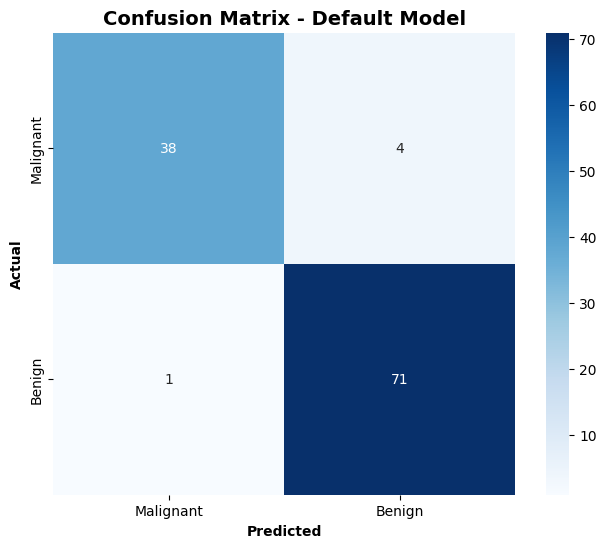

In [30]:
# Confusion Matrix
cm_default = confusion_matrix(y_test, y_pred_default)
print("--- Confusion Matrix ---")
print(cm_default)

plt.figure(figsize=(8, 6))

sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Malignant', 'Benign'],
           yticklabels=['Malignant', 'Benign'],
           cbar=True, square=True)

plt.title('Confusion Matrix - Default Model', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')

plt.show()

# STEP 8: CROSS-VALIDATION

In [33]:
cv_scores = cross_val_score(model_default, X_train_scaled, y_train,
                             cv=5, scoring='accuracy', n_jobs=-1)

print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print(f"\n--- Comparison ---")
print(f"CV Accuracy (5-fold): {cv_scores.mean():.4f}")
print(f"Test Accuracy:        {acc_default:.4f}")
print(f"Difference:           {abs(cv_scores.mean() - acc_default):.4f}")

if abs(cv_scores.mean() - acc_default) < 0.03:
    print("\n✅ Model generalizes well!")
else:
    print("\n⚠️ Some gap - possible overfitting")

CV Accuracy Scores: [0.95604396 0.97802198 0.92307692 0.97802198 0.97802198]
Mean CV Accuracy: 0.9626 (+/- 0.0215)

--- Comparison ---
CV Accuracy (5-fold): 0.9626
Test Accuracy:        0.9561
Difference:           0.0065

✅ Model generalizes well!


# STEP 9: HYPERPARAMETER TUNING

In [34]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("Running GridSearchCV...")
print("Expected time: 30-60 seconds...")

grid_search = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\n--- Best Hyperparameters Found ---")
for param, value in grid_search.best_params_.items():
    print(f"✓ {param}: {value}")

print(f"✓ Best CV Accuracy: {grid_search.best_score_:.4f}")

Running GridSearchCV...
Expected time: 30-60 seconds...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- Best Hyperparameters Found ---
✓ colsample_bytree: 0.8
✓ learning_rate: 0.1
✓ max_depth: 5
✓ n_estimators: 100
✓ subsample: 0.8
✓ Best CV Accuracy: 0.9736


In [35]:
# Predict with tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)
y_pred_proba_tuned = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

In [36]:
acc_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("--- Tuned Model Performance ---")
print(f"Accuracy: {acc_tuned:.4f} ({acc_tuned*100:.1f}%)")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"ROC-AUC: {roc_auc_tuned:.4f}")

print(f"\n✓ Improvement: {(acc_tuned - acc_default)*100:+.2f}%")

--- Tuned Model Performance ---
Accuracy: 0.9649 (96.5%)
Precision: 0.9595
Recall: 0.9861
F1-Score: 0.9726
ROC-AUC: 0.9957

✓ Improvement: +0.88%


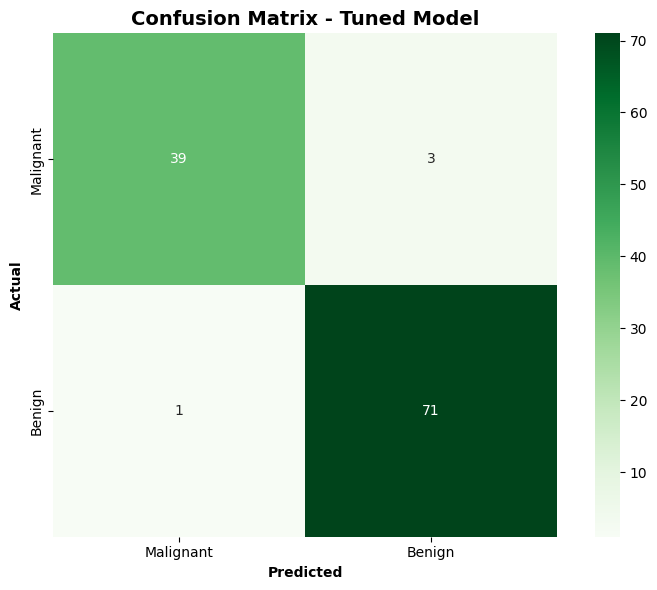

In [37]:
# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Malignant', 'Benign'],
           yticklabels=['Malignant', 'Benign'],
           cbar=True, square=True)
plt.title('Confusion Matrix - Tuned Model', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

# STEP 10: FEATURE IMPORTANCE

In [38]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("--- Top 20 Most Important Features ---")
print(feature_importance.head(20).to_string(index=False))

--- Top 20 Most Important Features ---
             Feature  Importance
     worst perimeter    0.249455
 mean concave points    0.164263
        worst radius    0.089779
          worst area    0.088895
worst concave points    0.069910
   worst compactness    0.063359
           mean area    0.026770
         mean radius    0.023828
     worst concavity    0.023179
        mean texture    0.022496
       worst texture    0.016852
    worst smoothness    0.015105
      mean concavity    0.014602
       texture error    0.014068
   compactness error    0.012731
     perimeter error    0.012695
     concavity error    0.011831
          area error    0.011720
      mean perimeter    0.010389
    mean compactness    0.009794


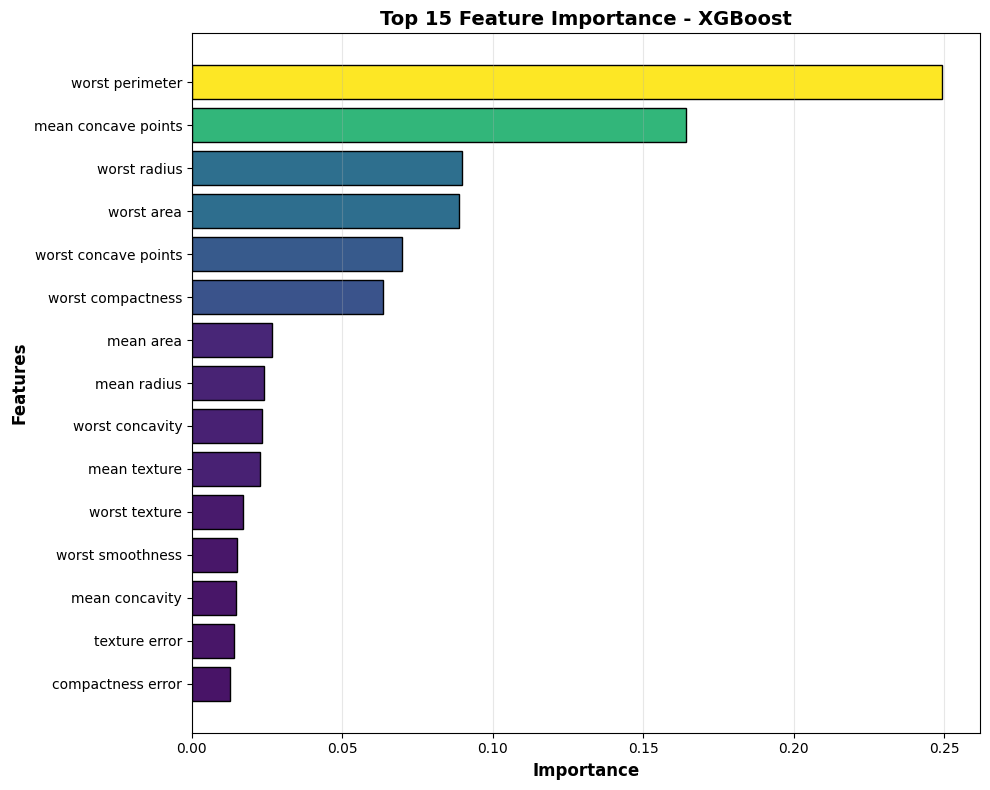


💡 Interpretation:
   • Most important feature: worst perimeter
   • Importance score: 0.2495


In [39]:
# Visualize top 15
plt.figure(figsize=(10, 8))
top_15 = feature_importance.head(15)
colors = plt.cm.viridis(top_15['Importance'] / top_15['Importance'].max())

plt.barh(top_15['Feature'], top_15['Importance'],
         color=colors, edgecolor='black')
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Features', fontweight='bold', fontsize=12)
plt.title('Top 15 Feature Importance - XGBoost', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
most_important = feature_importance.iloc[0]
print(f"   • Most important feature: {most_important['Feature']}")
print(f"   • Importance score: {most_important['Importance']:.4f}")


# STEP 11: ROC-AUC CURVE

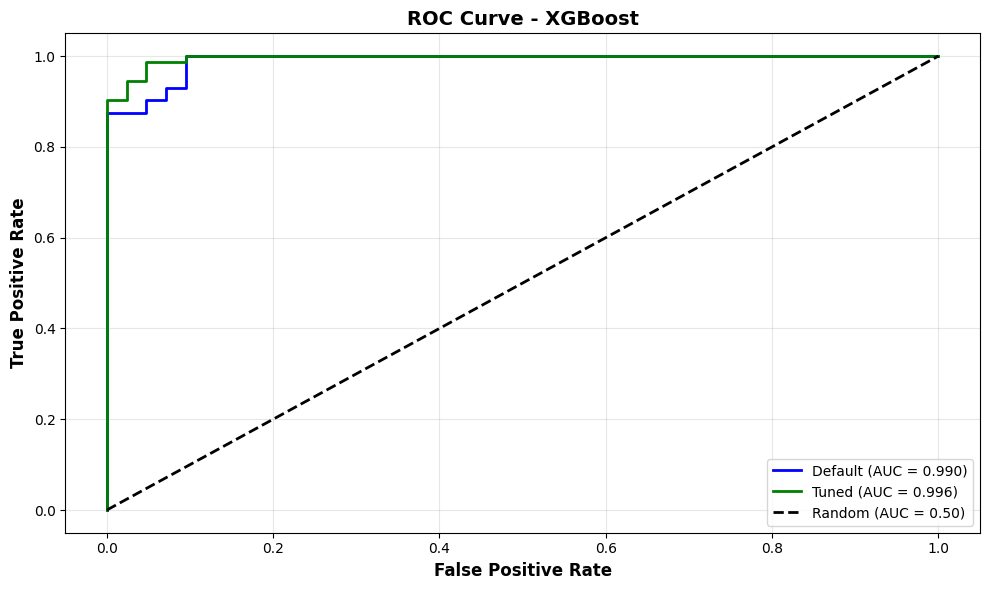

In [40]:
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

plt.figure(figsize=(10, 6))
plt.plot(fpr_default, tpr_default, linewidth=2,
         label=f'Default (AUC = {roc_auc_default:.3f})', color='blue')
plt.plot(fpr_tuned, tpr_tuned, linewidth=2,
         label=f'Tuned (AUC = {roc_auc_tuned:.3f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.50)')

plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curve - XGBoost', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# STEP 12: LEARNING CURVES

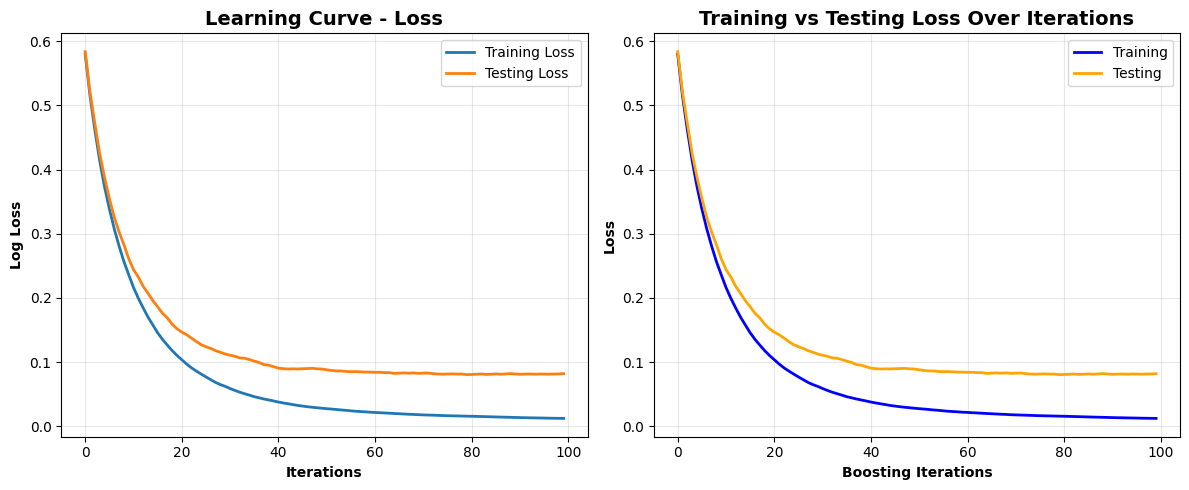


✓ Number of boosting rounds: 100
✓ Final training loss: 0.0121
✓ Final testing loss: 0.0818


In [41]:
# Train with evaluation set to see learning progress
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]

model_with_eval = XGBClassifier(
    **grid_search.best_params_,
    random_state=42,
    eval_metric='logloss'
)

model_with_eval.fit(
    X_train_scaled, y_train,
    eval_set=eval_set,
    verbose=False
)

# Get evaluation results
results = model_with_eval.evals_result()

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results['validation_0']['logloss'], label='Training Loss', linewidth=2)
plt.plot(results['validation_1']['logloss'], label='Testing Loss', linewidth=2)
plt.xlabel('Iterations', fontweight='bold')
plt.ylabel('Log Loss', fontweight='bold')
plt.title('Learning Curve - Loss', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot accuracy over iterations (if available)
plt.subplot(1, 2, 2)
train_errors = results['validation_0']['logloss']
test_errors = results['validation_1']['logloss']
plt.plot(range(len(train_errors)), train_errors, label='Training', linewidth=2, color='blue')
plt.plot(range(len(test_errors)), test_errors, label='Testing', linewidth=2, color='orange')
plt.xlabel('Boosting Iterations', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.title('Training vs Testing Loss Over Iterations', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Number of boosting rounds: {len(train_errors)}")
print(f"✓ Final training loss: {train_errors[-1]:.4f}")
print(f"✓ Final testing loss: {test_errors[-1]:.4f}")


# STEP 13: MODEL COMPARISON

In [42]:
comparison = pd.DataFrame({
    'Model': ['Default', 'Tuned'],
    'Accuracy': [acc_default, acc_tuned],
    'Precision': [precision_default, precision_tuned],
    'Recall': [recall_default, recall_tuned],
    'F1-Score': [f1_default, f1_tuned],
    'ROC-AUC': [roc_auc_default, roc_auc_tuned]
})

print(comparison.to_string(index=False))

best_idx = comparison['Accuracy'].idxmax()
print(f"\n✓ Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"✓ Best Accuracy: {comparison.loc[best_idx, 'Accuracy']:.4f}")


  Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Default  0.956140   0.946667 0.986111  0.965986 0.990079
  Tuned  0.964912   0.959459 0.986111  0.972603 0.995701

✓ Best Model: Tuned
✓ Best Accuracy: 0.9649


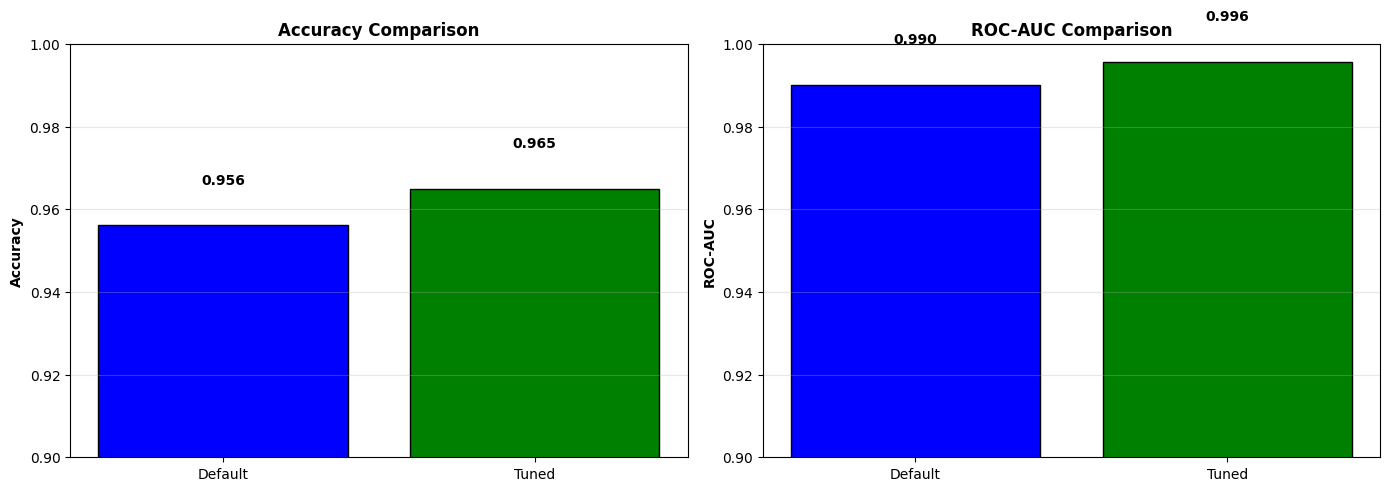

In [43]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics = ['Accuracy', 'ROC-AUC']
for idx, (ax, metric) in enumerate(zip(axes, metrics)):
    ax.bar(comparison['Model'], comparison[metric],
           color=['blue', 'green'], edgecolor='black')
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_ylim([0.90, 1.0])
    ax.grid(True, alpha=0.3, axis='y')

    for i, v in enumerate(comparison[metric]):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()